<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders, Jef fHale_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions using a dataset of Sacramento real estate sales.  

### 1. Read in the Sacramento housing data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [3]:
housing = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this dataset. 

#### Report any notable findings here and any steps you take to clean/process data.

> **Note:** Many EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [4]:
housing

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
housing.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
housing.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [8]:
housing_clean = housing[(housing != 0).all(1)]

In [9]:
housing_clean = housing_clean[housing_clean['sq__ft'] > 0]

In [10]:
housing_clean.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,95761.400984,3.247232,1.961870,1591.892989,229471.130381,38.576931,-121.378533
std,85.357516,0.849012,0.669367,663.908347,119897.576889,0.126352,0.119730
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473814,-121.451444
50%,95820.000000,3.000000,2.000000,1419.000000,207973.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables in the dataset you think might be good predictors of price. 

For each of the numeric variables you believe might be a potential predictor in an regression model, generate a plot showing the relationship between the independent and dependent variables.

In [11]:
# Possible good predictors:
    #zip
    #beds
    #baths
    #sq__ft

In [12]:
price_housing = housing_clean.drop(['street', 'city', 'state', 'latitude', 'longitude', 'type', 'sale_date'], axis = 'columns')

In [13]:
price_housing.head()

,zip,beds,baths,sq__ft,price
0,95838,2,1,836,59222
1,95823,3,1,1167,68212
2,95815,2,1,796,68880
3,95815,2,1,852,69307
4,95824,2,1,797,81900


''

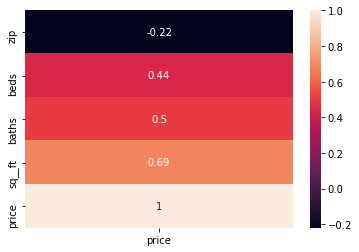

In [14]:
sns.heatmap(price_housing.corr()[['price']].sort_values(by='price'), annot = True)
;

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. For example:
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [15]:
price_housing.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which single numeric variable (x) would likely be the best predictor of price (y)? Why?

In [16]:
# sq__ft looks like the best variable because it has the highest correlation at .69

### 5. Make a Series named _x_ (lowercase because it's a vector) that consists of only numeric column you chose above.

In [17]:
x = price_housing[['sq__ft']]

### 6. Make a Series named _y_ that consists of only the 'price' column.

In [18]:
y = price_housing['price']

### 7. Use scikit-learn's LinearRegression class to instantiate and fit a model with just the one numeric column you think is the best predictor of price. 

This is simple linear regression because there is only one predictor column. 

> Note: Scikit-learn estimators expect a 2-dimensional predictor array because usually we have more than one predictor. Make yours 2-dimensional before fitting the model.

To construct your model don't forget to load in the scikit-learn class and instantiate a model

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# ...
```

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x, y)

LinearRegression()

### 8. Use your model to make predict price for each X.

In [22]:
y_preds = lr.predict(x)

### 9. Score your model on r-squared, mean_absolute_error, and root_mean_squared_error

Feel free to make a function that accepts y_true and y_predicted and prints out the model's performance on all those metrics.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
# r-squared
lr.score(x, y)

0.4814995615437454

In [25]:
# mean absolute error
mean_absolute_error(y, y_preds)

60222.69461586803

In [26]:
# root mean squared error
mean_squared_error(y, y_preds, squared = False)

86281.50502449076

### 10. Make a null-model. One that has the mean as the predicted price. Score that model on the metrics above. Which model does better?

In [27]:
mean_x = np.full_like(x, y.mean())

In [28]:
# r-squared
lr.score(mean_x, y)

-56796.70913834868

In [29]:
mean_y_array = np.full_like(y, y.mean())

In [30]:
# mean absolute error
mean_absolute_error(y, mean_y_array)

88321.78351783518

In [31]:
# root mean squared error
mean_squared_error(y, mean_y_array, squared = False)

119823.81645357743

The first model does better.

### 11. Make a DataFrame named _X_ (that's capital X, because it's a 2-d array) that consists of the following predictor columns only: 

- city
- beds
- baths
- sq__ft
- type  

In [32]:
X = housing_clean[['beds', 'baths', 'sq__ft', 'type']]

In [33]:
X.head()

,beds,baths,sq__ft,type
0,2,1,836,Residential
1,3,1,1167,Residential
2,2,1,796,Residential
3,2,1,852,Residential
4,2,1,797,Residential


## Dummy Variables

---

When building a regression model is important to be cautious with categorical variables, which represent distinct groups or categories. If put in a regression "as-is," categorical variables represented as integers will be treated as **continuous** variables.

That is to say, instead of the value "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, say we have a problem where occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary. If we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will not help our regression model and make the interpretation of the coefficient nonsensical. Instead, we can represent the categories as multiple "dummy coded" columns.

There are several ways to dummy-encode a columns' values in Python. 
- You can manually create new columns where each value gets it's own column. If the value is present that row gets a `1` otherwise it gets a `0`.
- You can use `pd.get_dummies` function. This does not work well once you have a test set. 
- You can use scikit-learn's `OneHotEncoder` class. This works well, but makes it hard to select columns by name in a pipeline for further transformation because it returns a SciPy sparse matrix by default and a NumPy array if specified. You'll learn about pipelines soon.
- You can use category_encoder's `OneHotEncoder` class. It mimics the scikit-learn API but let's you return a DataFrame after the encoding. category_encoders has many other encoding options available.

### 12. Dummy encode categorical variables

Use the category_encoders package's OneHotEncoder class to convert the object (string or categorical) columns into dummy-coded variables. Save the resulting DataFrame as a new variable.

```
# !pip install category_encoders  #uncomment and run if not installed

from category_encoders import OneHotEncoder

ohe = OneHotEncoder()

X = ohe.fit_transform(X)
X
```

>Remember that `value_counts` can help you see the count of each of the values in a column.

In [34]:
!pip install category_encoders

In [35]:
from category_encoders import OneHotEncoder

In [36]:
ohe = OneHotEncoder()

In [37]:
X = ohe.fit_transform(X)

C:\Users\Lindsey\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


### 13. Does your DataFrame look how you expect? Check with .head().

In [38]:
X.head()

,beds,baths,sq__ft,type_1,type_2,type_3
0,2,1,836,1,0,0
1,3,1,1167,1,0,0
2,2,1,796,1,0,0
3,2,1,852,1,0,0
4,2,1,797,1,0,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a categorical variable into dummy variables, you want to turn a variable with K categories into K-1 features.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |

_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> **Scenario 2:** Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 14. Drop one of the columns resulting from OneHotEncoding so you can do inference.

In [39]:
X.drop('type_1', axis = 1, inplace = True)

In [40]:
X.head()

,beds,baths,sq__ft,type_2,type_3
0,2,1,836,0,0
1,3,1,1167,0,0
2,2,1,796,0,0
3,2,1,852,0,0
4,2,1,797,0,0


### 15. Using scikit-learn, build what you think will be a strong model with multiple predictors for`price`. 

The features are your choice, but *include at least three* At least one should be the dummy-coded columns (either `type` or a new one you engineer).

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(X, y)

LinearRegression()

In [43]:
y_pred = lr.predict(X)

In [44]:
lr.score(X, y)

0.4919323552037268

In [45]:
X.shape

(813, 5)

In [46]:
y.shape

(813,)

In [47]:
lr.coef_

array([-14236.58021393,   8199.14340309,    130.58917767, -33861.55142387,
       -58862.23330365])

In [48]:
lr.intercept_

54379.84087971487

In [49]:
residuals = y - y_pred

### 16. Plot the true price vs the predicted price to evaluate your model visually.

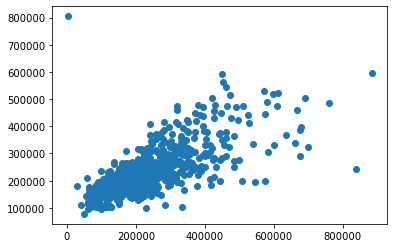

In [50]:
plt.scatter(y, y_pred)
# plt.scatter(y, y)

### 17. List the five assumptions for a multiple linear regression model 
If you want a good-performing model that you can do inference on (assuming there is signal in your data).


1) The Two Variables Should be in a Linear Relationship. <br>
2) All the Variables Should be Multivariate Normal.<br>
3) There Should be No Multicollinearity in the Data.<br>
4) There Should be No Autocorrelation in the Data.<br>
5) There Should be Homoscedasticity Among the Data.<br>

### 18. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

1) I believe my model meets the first assumption because the scatter plot does shows somewhat of a linear relationship.<br>
2) I do not believe my model meets the third assumption because there is a high correlation between beds and baths.

''

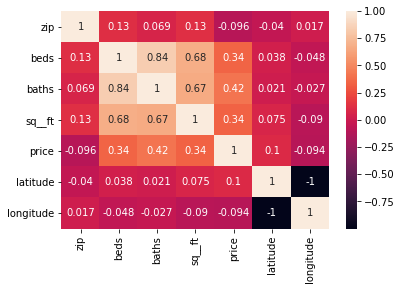

In [51]:
sns.heatmap(housing.corr(),annot = True)
;

### 19. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the same model. 

Scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  

To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# check out the add_constant method

# The default here is Linear Regression (ordinary least squares regression OLS)

model = sm.OLS(y,X).fit()
# ...

```

Write a few sentences interpreting some of the output.

In [52]:
import statsmodels.api as sm

In [53]:
# https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html

X = sm.add_constant(X)

In [54]:
X.head()

,const,beds,baths,sq__ft,type_2,type_3
0,1.0,2,1,836,0,0
1,1.0,3,1,1167,0,0
2,1.0,2,1,796,0,0
3,1.0,2,1,852,0,0
4,1.0,2,1,797,0,0


In [55]:
# help from https://www.statsmodels.org/devel/examples/notebooks/generated/ols.html

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          4.63e-116
Time:                        14:58:01   Log-Likelihood:                -10385.
No. Observations:                 813   AIC:                         2.078e+04
Df Residuals:                     807   BIC:                         2.081e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.438e+04   1.35e+04      4.033      0.0


The R-squared value is 0.492, meaning my model explains 49.2% of the variance in housing prices using beds, baths, sq ft, and type. The Adj. R-squared value is slightly lower than our R-squared value, meaning some of the variables may not be contributing to my model properly. The coefficients show how change in that variable affects housing prices. For example, when there is an increase of one square foot, the housing price increases \\$130.59, all else held constant.

https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### 20. [Bonus] Test and/or validation sets

Note that we haven't used a test set or cross validation in this project. If you're looking for more practice add one or both of those to get a better feel for how your model generalizes. How do your models perform?

In [56]:
# A: 